In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


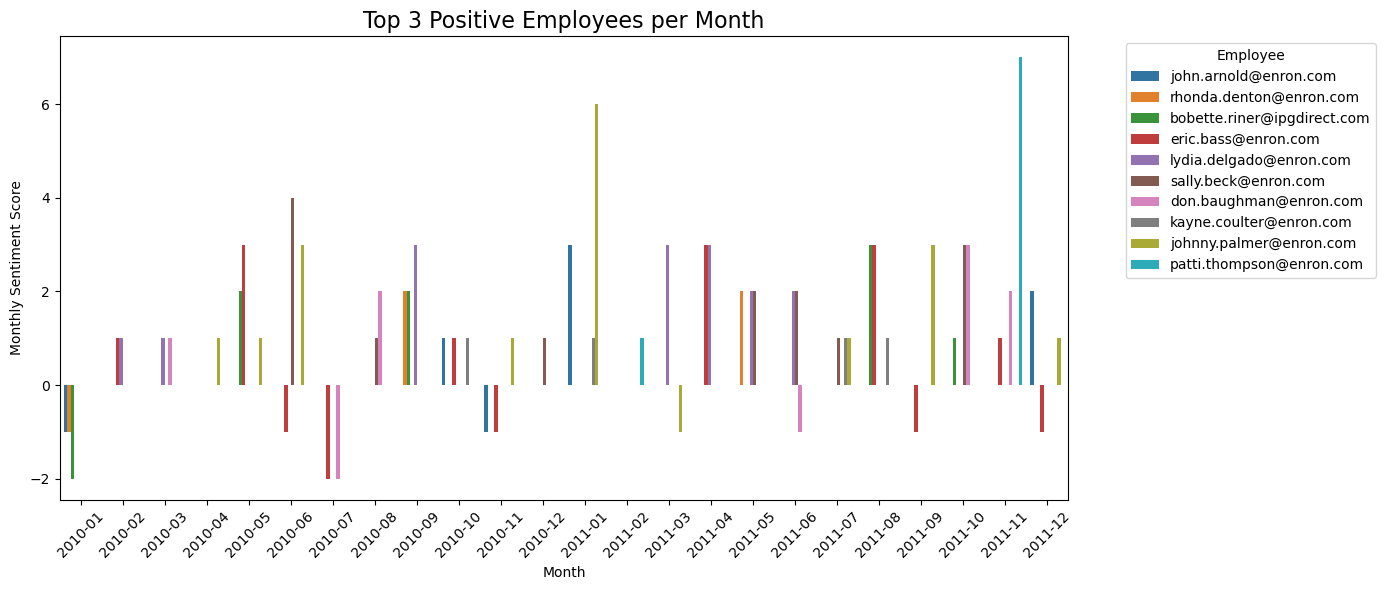

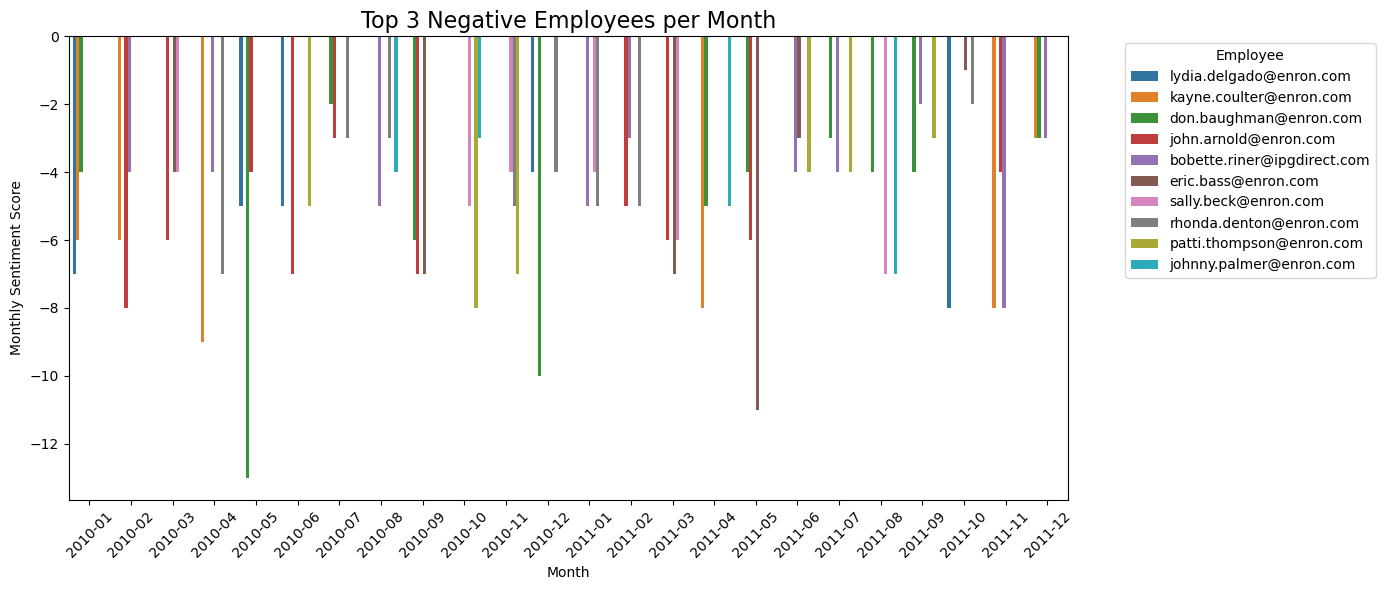

In [5]:


# Load monthly scores
monthly_scores = pd.read_csv("monthly_employee_sentiment_scores.csv")

# Convert year_month to string
monthly_scores['year_month'] = monthly_scores['year_month'].astype(str)

# Initialize lists
top_positive_list = []
top_negative_list = []

# Group by month
grouped_by_month = monthly_scores.groupby('year_month')

for month, group in grouped_by_month:
    sorted_group = group.sort_values(['monthly_sentiment_score', 'from'], ascending=[False, True])
    top_positive = sorted_group.head(3).copy()
    top_positive['rank'] = range(1, 4)
    top_positive_list.append(top_positive)
    
    sorted_negative = group.sort_values(['monthly_sentiment_score', 'from'], ascending=[True, True])
    top_negative = sorted_negative.head(3).copy()
    top_negative['rank'] = range(1, 4)
    top_negative_list.append(top_negative)

# Concatenate
top_positive_df = pd.concat(top_positive_list).reset_index(drop=True)
top_negative_df = pd.concat(top_negative_list).reset_index(drop=True)

# ---------------------------
# Visualization
# ---------------------------
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_positive_df,
    x="year_month", y="monthly_sentiment_score", hue="from"
)
plt.title("Top 3 Positive Employees per Month", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Monthly Sentiment Score")
plt.legend(title="Employee", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_negative_df,
    x="year_month", y="monthly_sentiment_score", hue="from"
)
plt.title("Top 3 Negative Employees per Month", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Monthly Sentiment Score")
plt.legend(title="Employee", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
